In [ ]:
## Generate Motion Primitives

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def visualize(nodes, edges):
# Plot nodes
    for (x, y) in nodes:
        plt.scatter(x, y, color='blue')

    # Plot edges
    for (n1, n2) in edges:
        x_values = [n1[0], n2[0]]
        y_values = [n1[1], n2[1]]
        plt.plot(x_values, y_values, color='red')

    # Display the plot
    
    

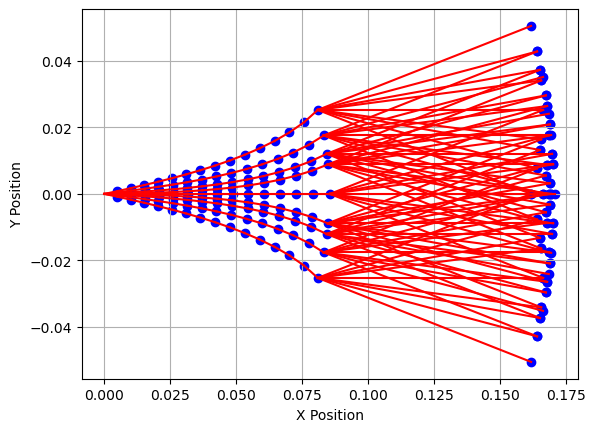

In [2]:
def move(state, dt):
    x, y, theta, v = state
    dt = dt/10
    theta_new = theta
    steering_angle = theta
    x_old = initial_state[0]
    y_old = initial_state[1]
    for i in range(15):
        if theta == 0:
            theta_new = 0
        else:
            theta_new = theta_new + (v / L) * np.tan(steering_angle) * dt
        x = x + v * np.cos(theta_new) * dt
        y = y + v * np.sin(theta_new) * dt
        if v < v_settle:
            v = v + acceleration * dt
        steering_angle = increment_angle(steering_angle,5)
        visualize([[x,y]],[[[x_old,y_old],[x,y]]])
        x_old = x
        y_old = y
    return [x, y, theta_new, v]

def get_theta(state, steering_angle):
    x, y, theta, v = state
    theta_new = theta + (v / L) * np.tan(steering_angle) * dt
    return theta_new

def increment_angle(curr_angle,delta_angle):
    if curr_angle < 0:
        sign = -1
    else:
        sign = 1
    return sign*(np.abs(curr_angle) + np.abs(np.radians(delta_angle)))
     


L = 0.3  # distance between front and rear axles
dt = 0.1  # time step
initial_state = [0.0, 0.0, 0.0, 0.5]  # [x, y, θ, v]
v_settle = 1.4
# Some control inputs (example)
acceleration = 1.0  # 1 m/s^2
descretized_steering_angles = [-45,-30,-15,-5,0,5,15,30,45] 
state_bank = []
nodes = []
edges = []

for steering_angle  in descretized_steering_angles:
        steering_angle = np.radians(steering_angle)  # in radians
        theta = get_theta(initial_state, steering_angle)
        temp_state = [initial_state[0],initial_state[1],theta,initial_state[3]]
        new_state = move(temp_state, dt)
        state_bank.append(new_state)
        node = [new_state[0],new_state[1]]
        edge = [[initial_state[0],initial_state[1]],node]
        nodes.append(node)
        edges.append(edge)


def generate_motion_primitives(current_state):
    generated_states = []
    for delta_state in state_bank:
        #print("delta_State = ", delta_state)
        #print("curr_state = ",current_state)
        new_state = np.array(current_state) + np.array(delta_state)
        #print("new_state = ", new_state)
        generated_states.append(new_state)
    return generated_states


for state in state_bank:
    generated_states = generate_motion_primitives(state)
    edges = []
    nodes = []
    for curr_state in generated_states:
        nodes.append([curr_state[0],curr_state[1]])
        edges.append([[curr_state[0],curr_state[1]],[state[0],state[1]]])
        #print("curr_state = ",curr_state)
        #print("state",state)
    visualize(nodes,edges)
plt.grid(True)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()


#

In [11]:
def isObstructed(state):
    return False

def isGoal(state, goal_state):
    threshold = 0.5
    return np.abs(state[0]-goal_state[0]) + np.abs(state[1]-goal_state[1])
    
def getHeuristic(state, goal_state):
    return np.sqrt((state[0]-goal_state[0])^2 + (state[1]-goal_state[1])^2)


In [ ]:
goal_state = [-1,0,0,0,0]
current_state = [0,0,0,0.5]

while isGoal(current_state,goal_state) == False:

    